In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv('D://who_suicide_statistics.csv')

In [3]:
df

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [4]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


<Figure size 1152x576 with 0 Axes>

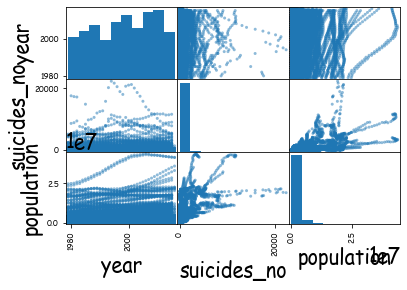

In [5]:
import pandas
from pandas.plotting import scatter_matrix
plt.figure(figsize=(16,8))
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['font.family']='fantasy'
names=['country','year','sex','age','suicides_no','population']
scatter_matrix(df)
plt.show()

In [6]:
df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [7]:
df=df.fillna(0)

In [8]:
df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  43776 non-null  float64
 5   population   43776 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [10]:
df=df.drop(['age'],axis=1)

In [11]:
df['sex']=pd.get_dummies(df['sex'])

In [12]:
df['sex']

0        1
1        1
2        1
3        1
4        1
        ..
43771    0
43772    0
43773    0
43774    0
43775    0
Name: sex, Length: 43776, dtype: uint8

In [13]:
df

,country,year,sex,suicides_no,population
0,Albania,1985,1,0.0,277900.0
1,Albania,1985,1,0.0,246800.0
2,Albania,1985,1,0.0,267500.0
3,Albania,1985,1,0.0,298300.0
4,Albania,1985,1,0.0,138700.0
...,...,...,...,...,...
43771,Zimbabwe,1990,0,150.0,0.0
43772,Zimbabwe,1990,0,132.0,0.0
43773,Zimbabwe,1990,0,6.0,0.0
43774,Zimbabwe,1990,0,74.0,0.0


In [14]:
x=df.iloc[:,1:6].values
y=df.iloc[:,0].values

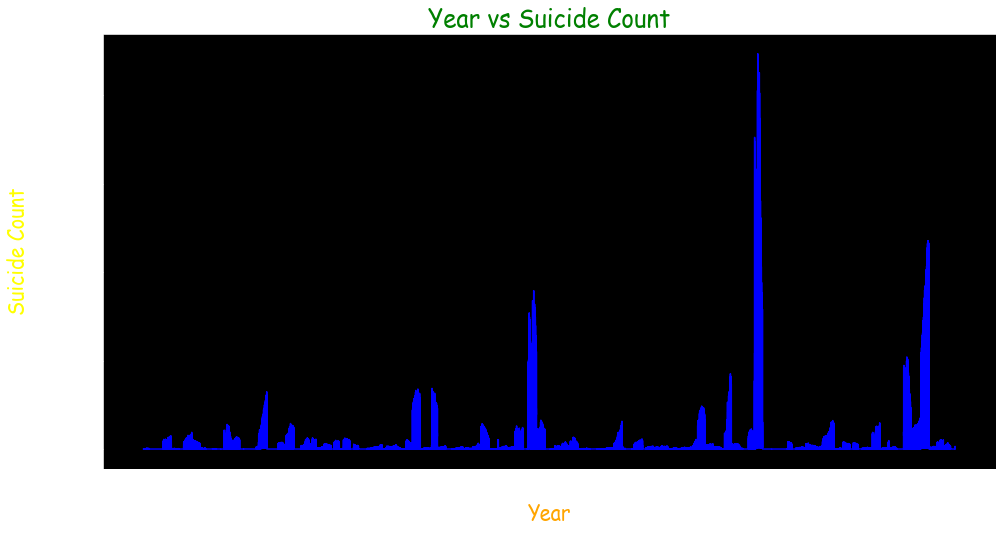

In [15]:
plt.figure(figsize=(16,8))
plt.style.use('dark_background')
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['font.family']='fantasy'
plt.title('Year vs Suicide Count',color='green')
plt.xlabel('Year',color='orange')
plt.ylabel('Suicide Count',color='yellow')
plt.plot(df['suicides_no'],color='blue')
plt.show()

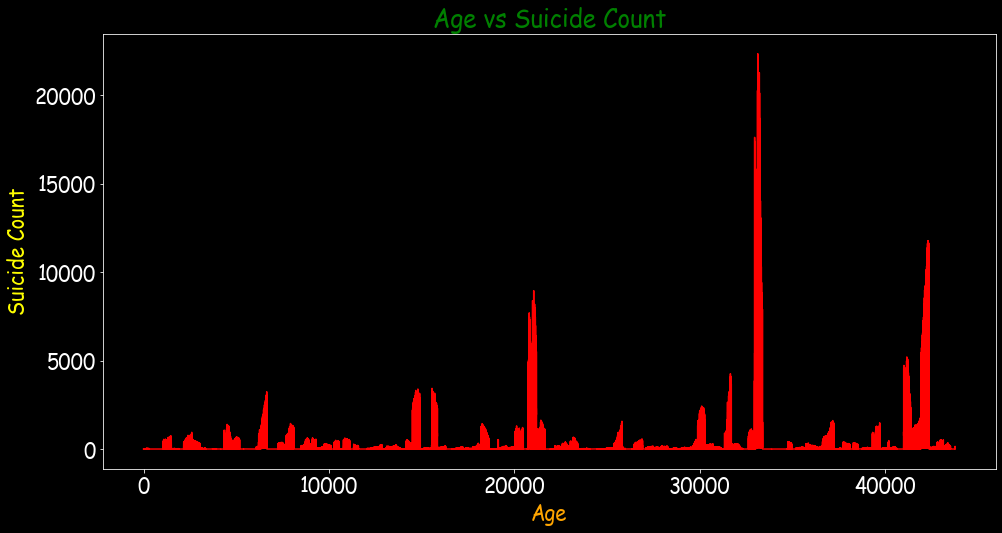

In [16]:
plt.figure(figsize=(16,8))
plt.style.use('dark_background')
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['font.family']='fantasy'
plt.title('Age vs Suicide Count',color='green')
plt.xlabel('Age',color='orange')
plt.ylabel('Suicide Count',color='yellow')
plt.plot(df['suicides_no'],color='Red')
plt.show()

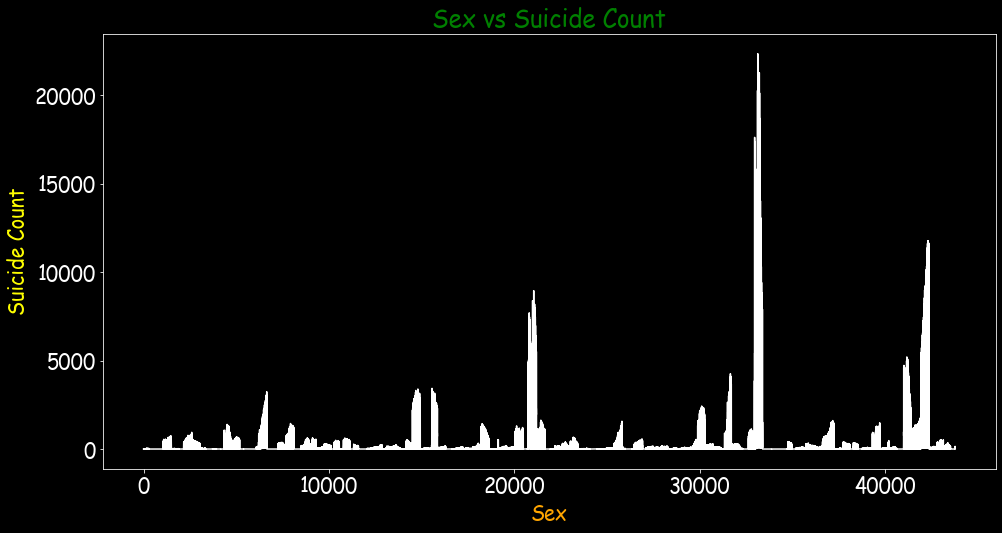

In [17]:
plt.figure(figsize=(16,8))
plt.style.use('dark_background')
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['font.family']='fantasy'
plt.title('Sex vs Suicide Count',color='green')
plt.xlabel('Sex',color='orange')
plt.ylabel('Suicide Count',color='yellow')
plt.plot(df['suicides_no'],color='White')
plt.show()

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [19]:
clf=DecisionTreeClassifier(random_state=40)

In [20]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [21]:
y_pred=clf.predict(x_test)

In [22]:
y_pred

array(['British Virgin Islands', 'Poland', 'Turkmenistan', ..., 'Romania',
       'Armenia', 'Georgia'], dtype=object)

In [23]:
accuracy_score(y_test,y_pred)

0.33576975788031066

In [24]:
cm=confusion_matrix(y_test,y_pred)

In [25]:
cm

array([[ 9,  0,  0, ...,  0,  0,  0],
       [ 0,  5,  0, ...,  0,  0,  0],
       [ 0,  0, 28, ...,  0,  2,  0],
       ...,
       [ 0,  0,  0, ..., 19,  0,  0],
       [ 0,  0,  6, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0,  2]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

C:\Users\SAYANTAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAYANTAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                    precision    recall  f1-score   support

                           Albania       0.13      0.12      0.12        77
                          Anguilla       0.03      0.06      0.04        80
               Antigua and Barbuda       0.44      0.41      0.43        68
                         Argentina       0.39      0.40      0.39        81
                           Armenia       0.13      0.12      0.13        83
                             Aruba       0.21      0.22      0.22        45
                         Australia       0.43      0.47      0.45        76
                           Austria       0.49      0.49      0.49        85
                        Azerbaijan       0.31      0.26      0.28        68
                           Bahamas       0.22      0.22      0.22        74
                           Bahrain       0.09      0.08      0.09        48
                          Barbados       0.40      0.42      0.41        76
           

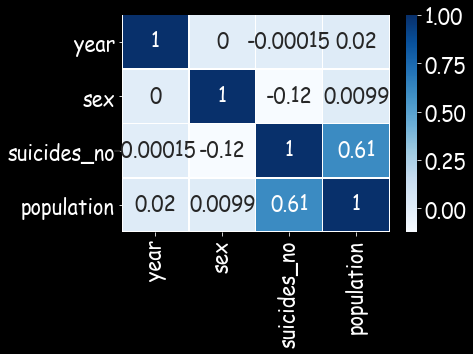

In [27]:
sb.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='Blues')

In [28]:
#plt.figure(figsize=(16,8))
#plt.style.use('dark_background')
#matplotlib.rcParams['font.size']=20
#matplotlib.rcParams['font.family']='fantasy'
#plt.title('year vs suicide_no',color='green')
#plt.xlabel('year',color='orange')
#plt.ylabel('suicide_no',color='yellow')
#plt.plot(df['suicides_no'],color='blue')
#plt.show()

In [29]:
#import seaborn as sns

In [30]:
#plt.figure(figsize=(16,8))
#plt.style.use('dark_background')
#matplotlib.rcParams['font.size']=20
#matplotlib.rcParams['font.family']='fantasy'
#plt.title('Age vs Suicide Count',color='green')
#plt.xlabel('Age',color='orange')
#plt.ylabel('Suicide Count',color='yellow')
#plt.plot(df['suicides_no'],color='Red')
#plt.show()

In [31]:
#plt.figure(figsize=(16,8))
#plt.style.use('dark_background')
#matplotlib.rcParams['font.size']=20
#matplotlib.rcParams['font.family']='fantasy'
#plt.title('Sex vs Suicide Count',color='green')
#plt.xlabel('Sex',color='orange')
#plt.ylabel('Suicide Count',color='yellow')
#plt.plot(df['suicides_no'],color='White')
#plt.show()

In [32]:
#import pandas
#from pandas.plotting import scatter_matrix
#names=['country','year','sex','age','suicides_no','population']
#scatter_matrix(df)
#plt.show()